In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
with open("train.p", mode='rb') as training_data:
  train = pickle.load(training_data)

with open("valid.p", mode='rb') as validation_data:
  valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
  test = pickle.load(testing_data)

In [6]:
X_train , y_train = train['features'], train['labels']
X_validation , y_validation = valid['features'], valid['labels']
X_test , y_test = test['features'] , test['labels']


In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

In [9]:
X_validation.shape

(4410, 32, 32, 3)

In [12]:
y_validation.shape

(4410,)

In [10]:
X_test.shape

(12630, 32, 32, 3)

In [11]:
y_test.shape

(12630,)

36

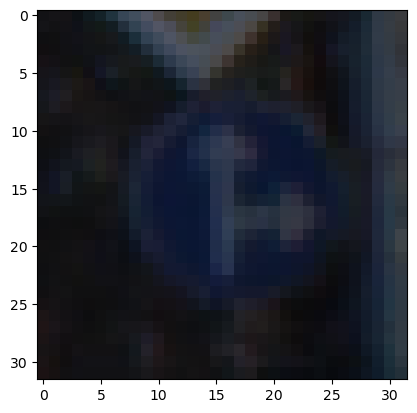

In [13]:
i = 1000
plt.imshow(X_train[i])
y_train[i]

17

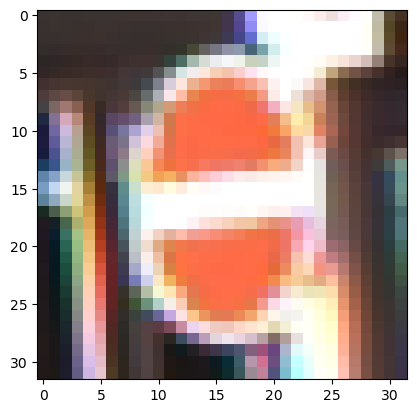

In [14]:
i = 4000
plt.imshow(X_validation[i])
y_validation[i]

11

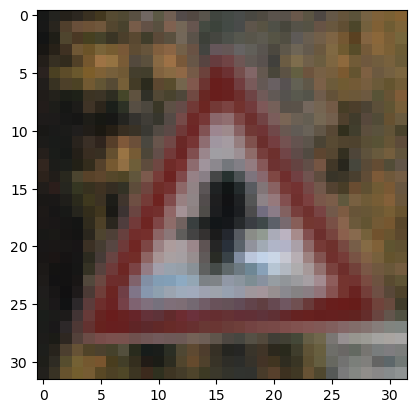

In [15]:
i = 3000
plt.imshow(X_test[i])
y_test[i]

26

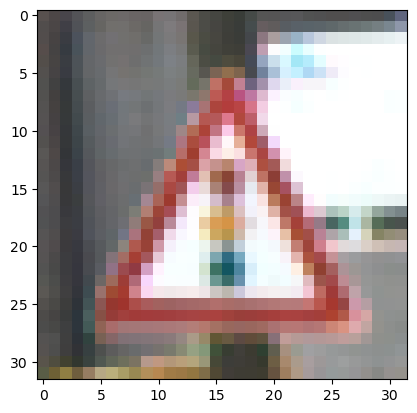

In [16]:
i = 5000
plt.imshow(X_test[i])
y_test[i]

In [17]:
from sklearn.utils import shuffle
X_train , y_train = shuffle(X_train , y_train)

In [18]:
X_train_grey = np.sum(X_train/3 , axis = 3 , keepdims = True)
X_test_grey = np.sum(X_test/3 , axis = 3 , keepdims = True)
X_validation_grey = np.sum(X_validation/3 , axis = 3 , keepdims = True)

In [19]:
X_train_grey.shape

(34799, 32, 32, 1)

In [20]:
X_test_grey.shape

(12630, 32, 32, 1)

In [21]:
X_validation_grey.shape

(4410, 32, 32, 1)

In [22]:
X_train_grey_norm = (X_train_grey - 128)/128
X_test_grey_norm = (X_test_grey - 128)/128
X_validation_grey_norm = (X_validation_grey - 128)/128

In [23]:
X_train_grey_norm

array([[[[-0.7578125 ],
         [-0.75      ],
         [-0.8046875 ],
         ...,
         [-0.68229167],
         [-0.5390625 ],
         [-0.51041667]],

        [[-0.76041667],
         [-0.78385417],
         [-0.796875  ],
         ...,
         [-0.703125  ],
         [-0.5546875 ],
         [-0.59895833]],

        [[-0.75520833],
         [-0.81770833],
         [-0.78385417],
         ...,
         [-0.66666667],
         [-0.59895833],
         [-0.68229167]],

        ...,

        [[-0.81510417],
         [-0.8828125 ],
         [-0.84895833],
         ...,
         [-0.83854167],
         [-0.86458333],
         [-0.859375  ]],

        [[-0.6484375 ],
         [-0.85416667],
         [-0.83854167],
         ...,
         [-0.85677083],
         [-0.87239583],
         [-0.87239583]],

        [[-0.6796875 ],
         [-0.84114583],
         [-0.89322917],
         ...,
         [-0.84895833],
         [-0.85416667],
         [-0.8515625 ]]],


       [[[-0.7421875 ],


In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.utils import shuffle

In [74]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)

In [75]:
# Example of applying data augmentation to the training set
augmented_images = []
for img in X_train_grey_norm:
    augmented_img = datagen.random_transform(img)
    augmented_images.append(augmented_img)

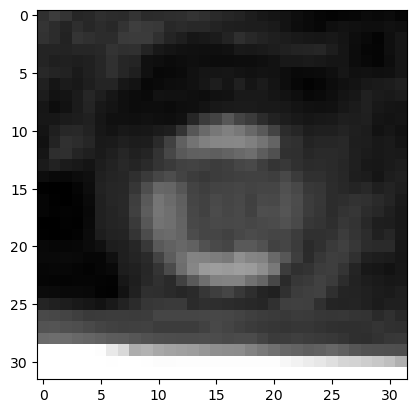

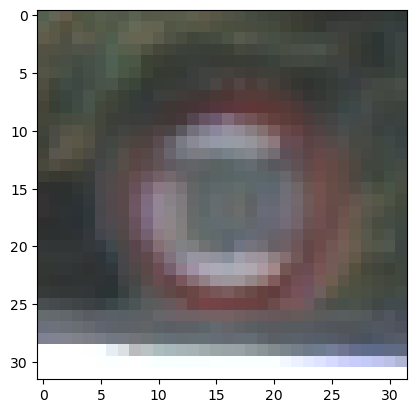

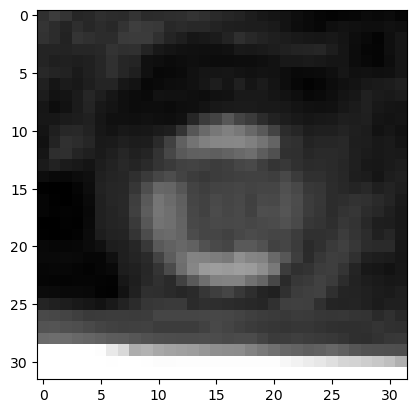

In [76]:
i = 1000
plt.imshow(X_train_grey[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_grey_norm[i].squeeze(),cmap = 'gray')

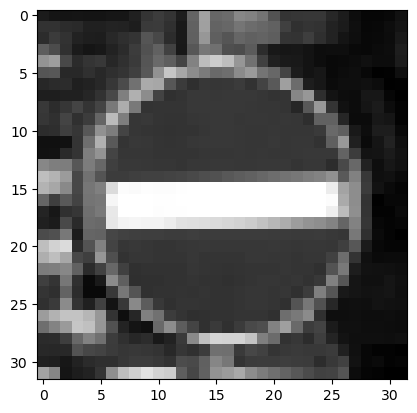

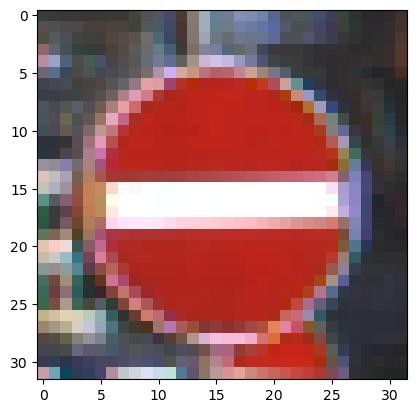

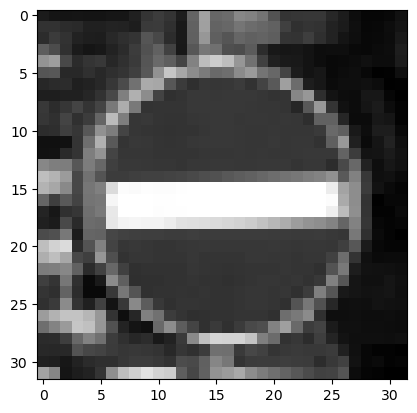

In [77]:
i = 1000
plt.imshow(X_test_grey[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_grey_norm[i].squeeze(),cmap = 'gray')

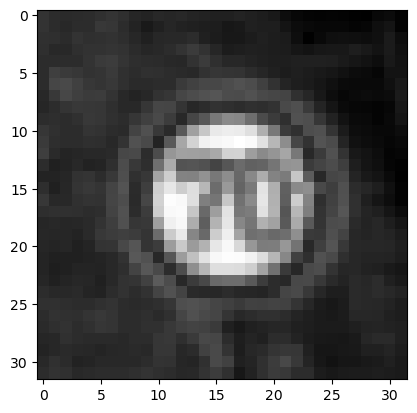

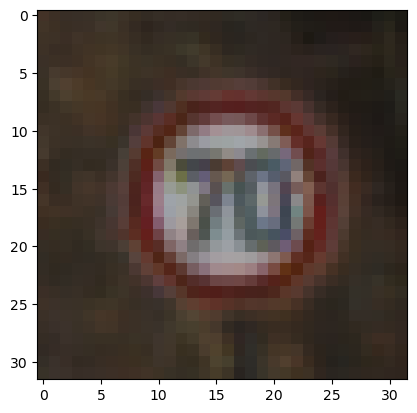

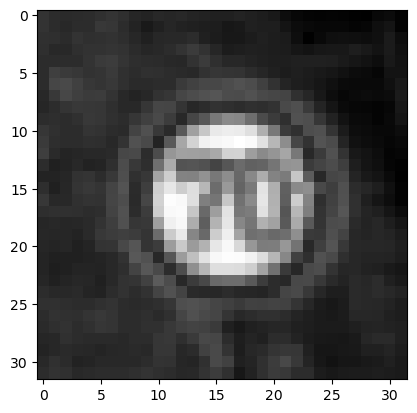

In [78]:
i = 1000
plt.imshow(X_validation_grey[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_grey_norm[i].squeeze(),cmap = 'gray')

In [79]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard


In [ ]:
cnn_model = Sequential()

# Input layer implicitly defined by specifying input_shape in the first layer
cnn_model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D(2,2))

cnn_model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn_model.add(AveragePooling2D(2,2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=43, activation='softmax'))


In [33]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
# Train the model with augmented data
history = cnn_model.fit(datagen.flow(X_train_grey_norm, y_train, batch_size=500),
                        steps_per_epoch=int(len(X_train_grey_norm) / 500),
                        epochs=50,
                        verbose=1,
                        validation_data=(X_validation_grey_norm, y_validation))



In [ ]:
#MODEL EVALUATION

In [35]:
score=cnn_model.evaluate(X_test_grey_norm,y_test)
print('Test Acuuracy: {}'.format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8724 - loss: 1.2334
Test Acuuracy: 0.8694378733634949


In [36]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [37]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


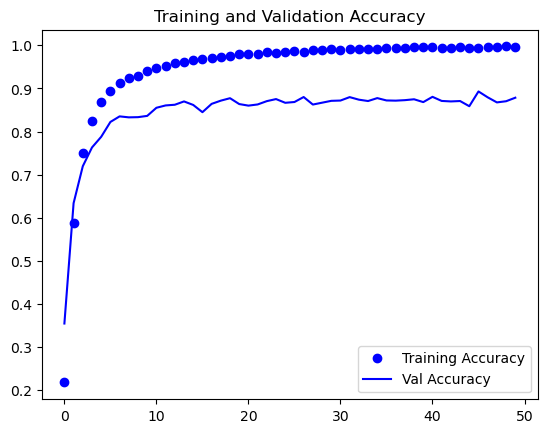

In [38]:
epochs=range(len(accuracy))

plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Val Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()

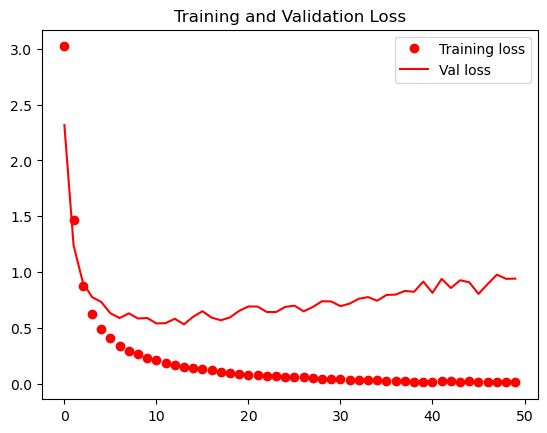

In [39]:
plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Val loss')
plt.title("Training and Validation Loss")

plt.legend()

In [40]:
predicted_classes = cnn_model.predict(X_test_grey_norm)
y_true = y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Axes: >

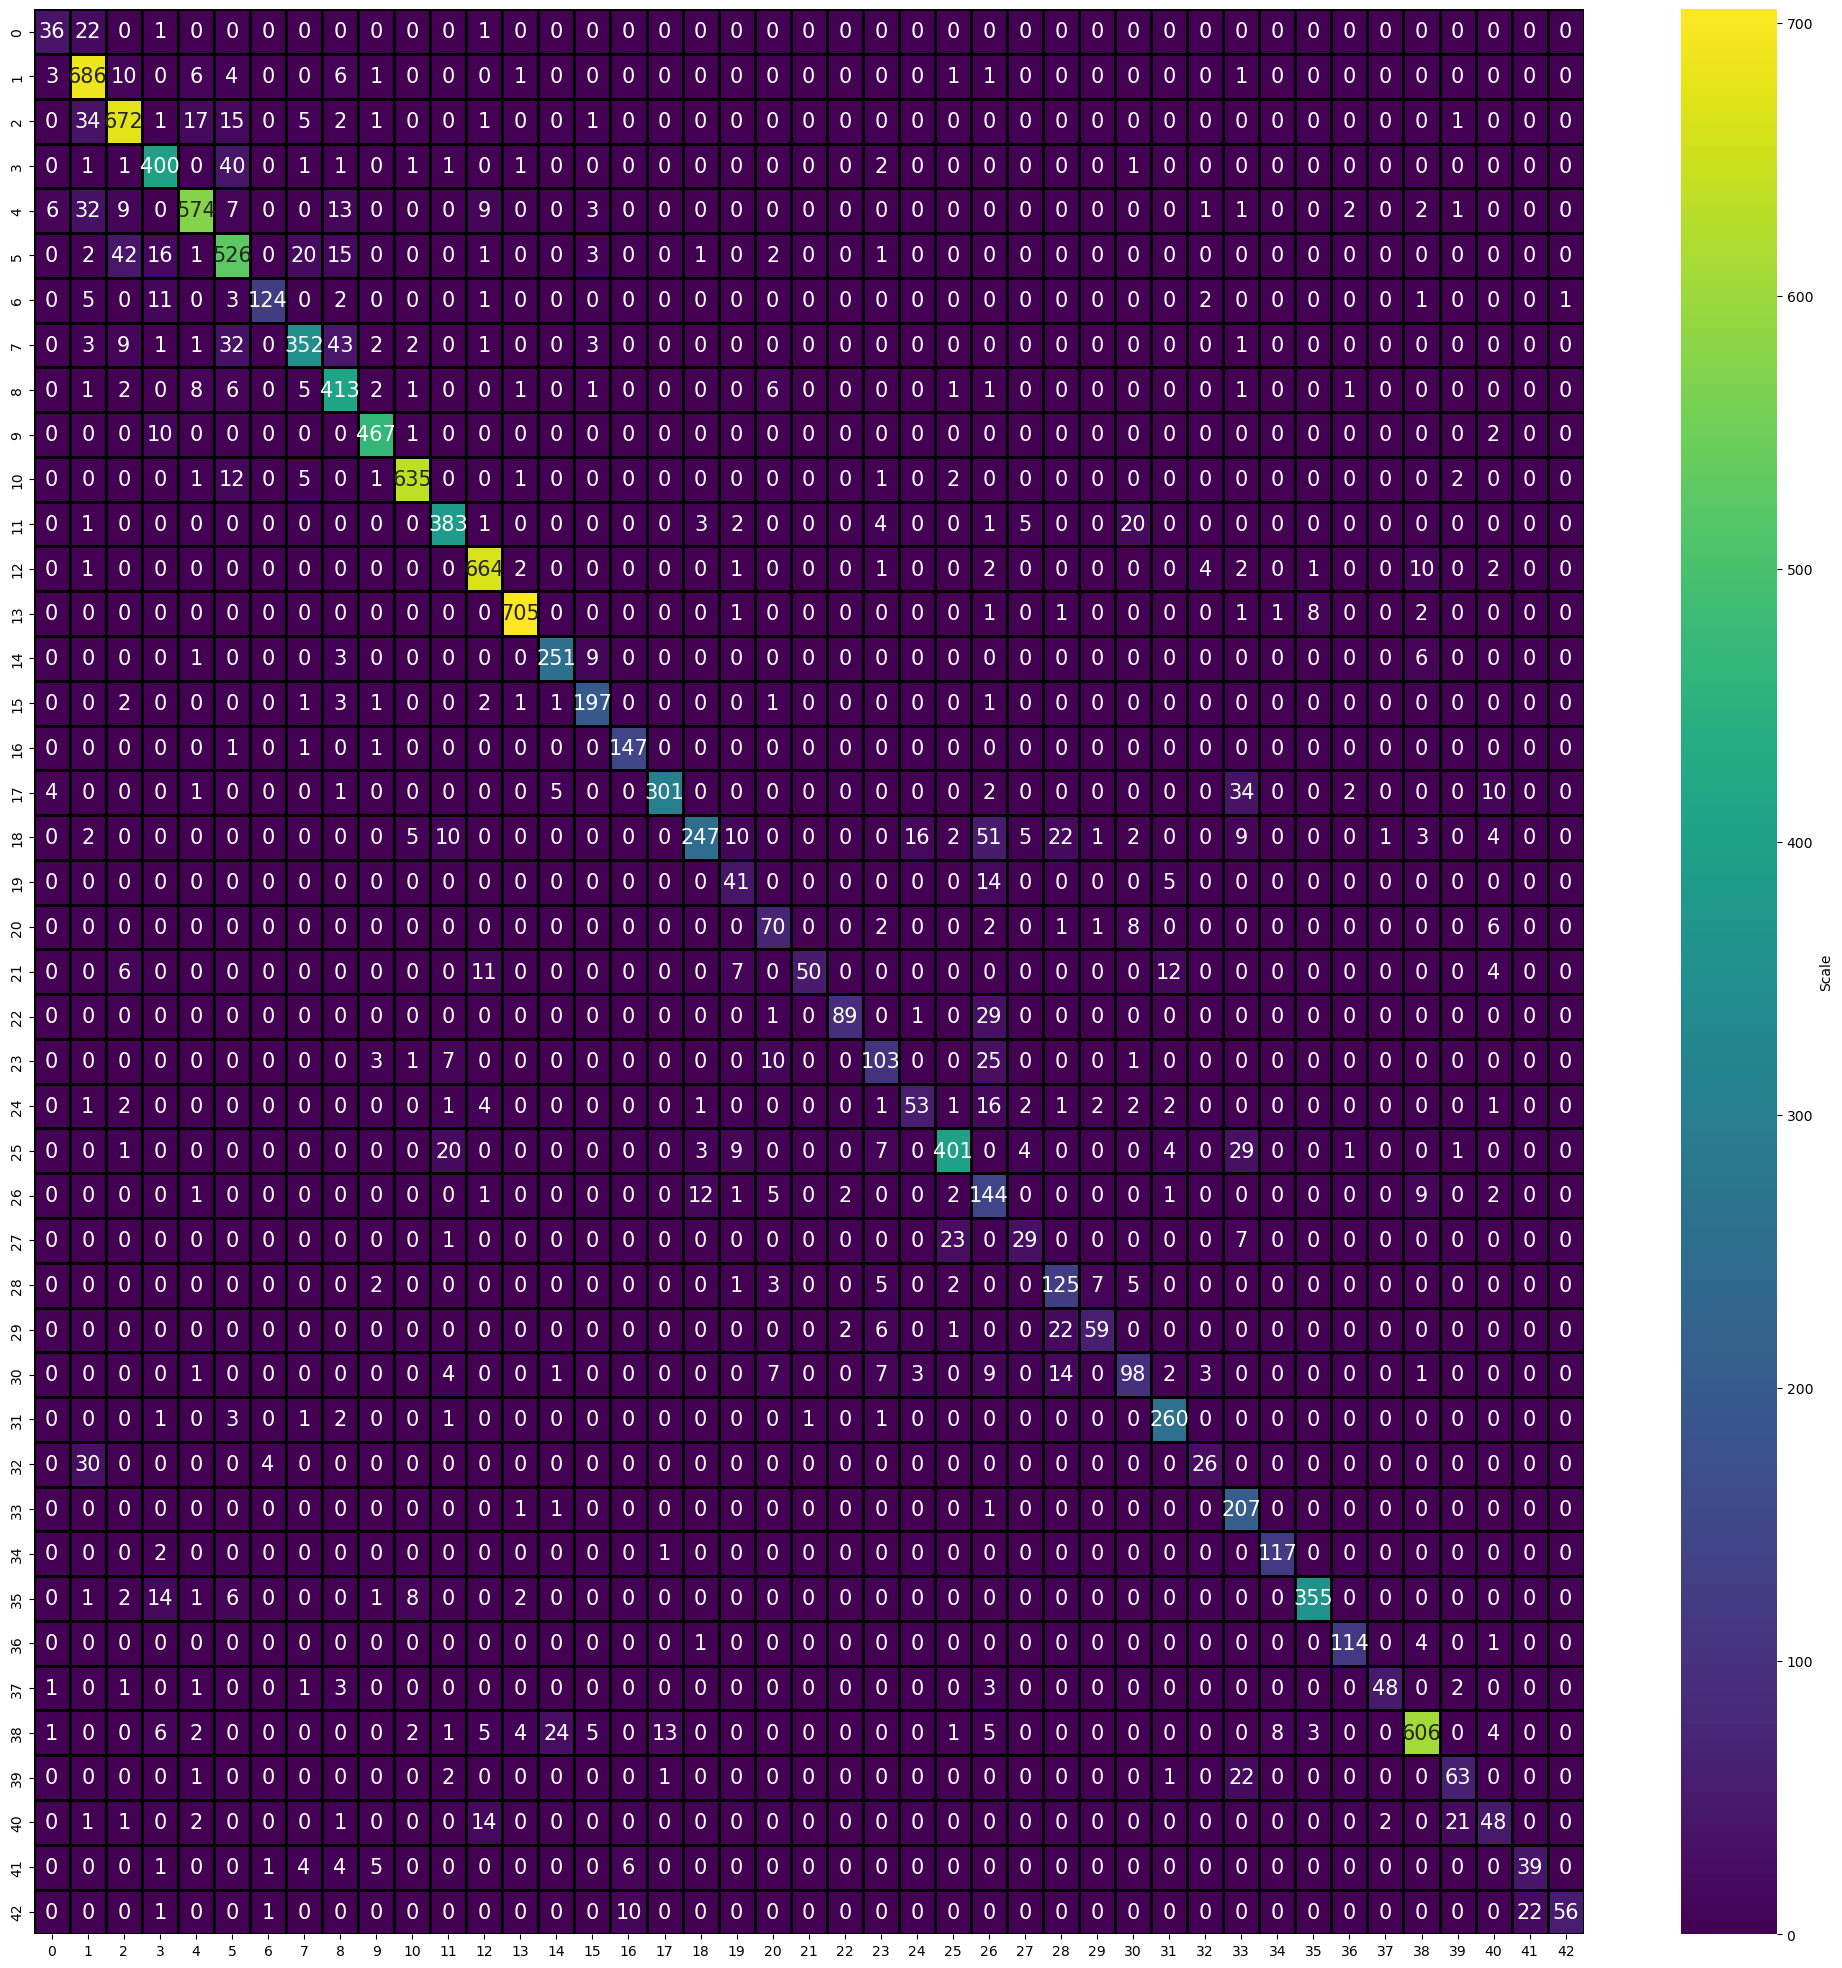

In [42]:
from sklearn.metrics import confusion_matrix
predicted_classes = np.argmax(predicted_classes, axis=1)
cm = confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Scale'}, annot_kws={"size": 15}, linewidths=1, linecolor='black')

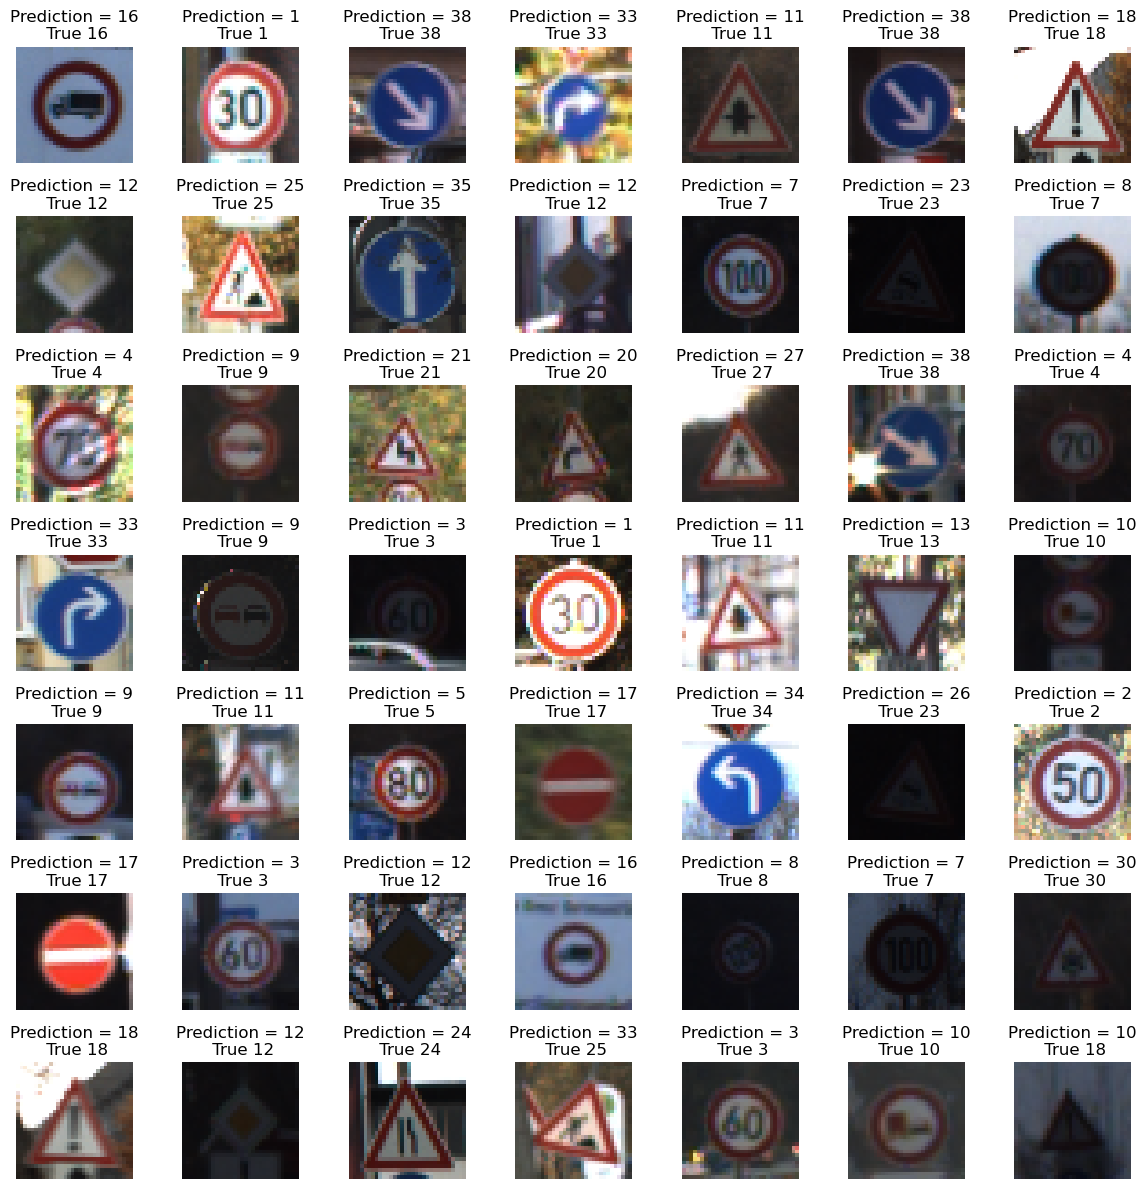

In [52]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].set_title('Prediction = {}\n True {}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')  # Turn off axis for better visualization

plt.subplots_adjust(wspace = 0)
plt.tight_layout()
plt.show()

In [53]:
class_names = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}



In [54]:
def get_class_name(class_id):
    return class_names.get(class_id, "Unknown Class")

# Example usage:
predicted_class = 14
print(f"The predicted class is: {get_class_name(predicted_class)}")


The predicted class is: Stop


In [58]:
# Save the trained model in the native Keras format
cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.save("cnn_model.keras")


In [59]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = tf.keras.models.load_model("cnn_model.keras")

# Ensure the model is compiled (re-compile if necessary)
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [60]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Dictionary to map class numbers to their respective names
class_names = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}

In [61]:
def get_class_name(class_id):
    return class_names.get(class_id, "Unknown Class")

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32), color_mode='grayscale')
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = (img - 128) / 128  # Normalize the image
    return img

In [62]:
def predict_image(img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    class_name = get_class_name(predicted_class)
    return predicted_class, class_name

def plot_image_with_prediction(img_path):
    predicted_class, class_name = predict_image(img_path)
    img = image.load_img(img_path, target_size=(32, 32), color_mode='grayscale')
    plt.imshow(img, cmap='gray')
    plt.title(f'Prediction: {class_name} ({predicted_class})')
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


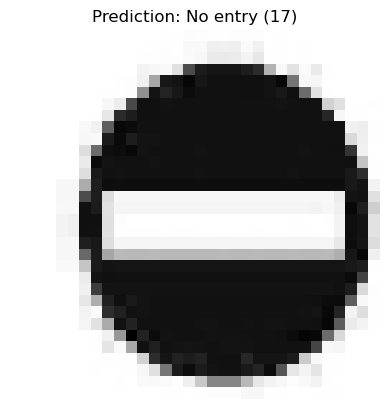

In [67]:
img_path = r"C:\Users\SEC\Downloads\Screenshot_9-7-2024_194831_www.godigit.com.jpeg"  # Replace with the path to your image
plot_image_with_prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


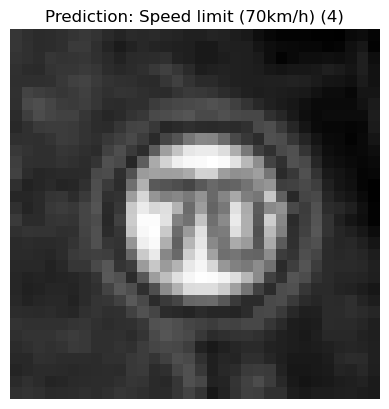

In [71]:
img_path = r"C:\Users\SEC\Pictures\Screenshots\Screenshot 2024-07-09 200001.png"  # Replace with the path to your image
plot_image_with_prediction(img_path)